In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt

# Train data
data = [[2, 1, 0], 
        [3, 1, 0], 
        [2, 3, 0], 
        [2, 0.5, 0], 
        [1, 1, 0],
        [1,2,0],
        [0.2,0.2,0],
        [2.5,4,1],
        [3, 1.5, 1], 
        [3.5, 0.5, 1], 
        [4, 1.5, 1],
        [2.5,3,1],
        [2.8,2,1],
        [4,3,1],
        [5.5, 1, 1]
       ]

test_data = [[2,5,1],
             [3.2, 1.2, 1],
             [3, 0.5, 1],
             [5, 5, 1],
             [2.5,5,1],
             [2.8,2,1],
             [5,1,1]
            ]


# Aktivation function
def sigmoid(x):
    return 1/(1+np.exp(-x))


def graphs():
    cost_lst = train()['costs']
    plt.plot(cost_lst, color = 'red')
    plt.title('Costs per prediction')
    
    plt.figure()
    plt.title('Data points')
    plt.axis([0,6,0,6])
    plt.grid()
    for i in range(len(data)):
        data_point = data[i]
        color = 'r'
        if data_point[2] == 0:
            color = 'b'
        plt.scatter(data_point[0], data_point[1], c = color)

In [3]:
def train(epochs = 50000):
    
    learning_rate = 0.6
    costs = []
    
    # Initializing weights and bias
    w1 = random.uniform(-0.1,0.1)
    w2 = random.uniform(-0.1,0.1)
    b = random.uniform(-0.1,0.1)
    
    for i in range(epochs):
        
        # Batch size: 1
        point = random.choice(data)
        target = point[2]
        
        z = w1 * point[0] + w2 * point[1] + b
        pred = sigmoid(z)
        
        cost = (pred-target)**2
        dcost_dpred = 2 * (pred-target)
        dpred_dz = sigmoid(z) * (1-sigmoid(z))
        
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1
        
        dcost_dw1 = dcost_dpred * dpred_dz * dz_dw1
        dcost_dw2 = dcost_dpred * dpred_dz * dz_dw2
        dcost_db = dcost_dpred * dpred_dz
        
        costs.append(cost)
        w1 -= learning_rate * dcost_dw1
        w2 -= learning_rate * dcost_dw2
        b -= learning_rate * dcost_db

    diff = 0
    for point1 in data:
        diff += abs(sigmoid(w1 * point1[0] + w2 * point1[1] + b) - point1[2])
    diff /= len(data)
    
    accuracy = (1 - diff) * 100
    
    return {'w1': w1, 'w2': w2, 'b': b, 'costs': costs, 'accuracy': accuracy}

results = train()

In [4]:
def prediction(x,y):
    result = train()
    weight1 = result['w1']
    weight2 = result['w2']
    const = result['b']
    z = weight1 * x + weight2 * y + const
    pred = sigmoid(z) # Final prediction
    accuracy = result['accuracy']
    print("Prediction: {} ---> {}, with an accuracy of {}%".format(pred,int(round(pred)),accuracy))
    return(pred)

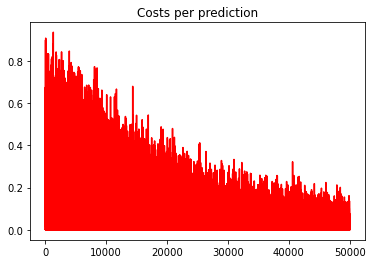

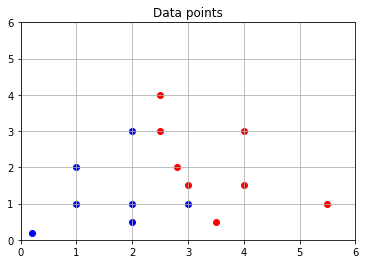

In [5]:
graphs()

In [6]:
i = 6
prediction(test_data[i][0],test_data[i][1])

Prediction: 0.9999999998638189 ---> 1, with an accuracy of 94.38084124090325%


0.9999999998638189

In [7]:
x = np.linspace(0, 10, 1000)
